## 0. 데이터 불러오기

In [47]:
import pandas as pd

df = pd.read_csv('서울교통공사_역별 시간대별 승하차인원(24.1~24.12).csv', encoding='euc-kr')
df

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,1,2024-01-01,1호선,150,서울역,승차,383,257,308,975,...,2716,2882,2871,2685,2922,2031,2279,1729,868,43
1,2,2024-01-01,1호선,150,서울역,하차,249,867,834,1201,...,2615,2501,2829,2095,1833,1465,1031,585,298,82
2,3,2024-01-01,1호선,151,시청,승차,188,92,167,245,...,935,1003,978,1116,951,909,723,462,176,3
3,4,2024-01-01,1호선,151,시청,하차,103,276,292,451,...,834,697,670,564,351,302,272,120,89,38
4,5,2024-01-01,1호선,152,종각,승차,970,374,193,205,...,1383,1578,1435,1422,1287,1318,1106,775,274,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199405,199406,2024-12-31,8호선,2826,수진,하차,14,85,152,477,...,355,414,465,468,376,261,248,246,175,68
199406,199407,2024-12-31,8호선,2827,모란,승차,80,103,332,400,...,389,537,440,381,247,136,170,140,90,50
199407,199408,2024-12-31,8호선,2827,모란,하차,19,109,138,428,...,263,340,340,374,281,193,212,207,141,128
199408,199409,2024-12-31,8호선,2828,남위례,승차,44,236,686,811,...,656,469,556,513,285,245,216,213,75,46


## 1. 데이터 전처리 및 가공

In [48]:
df = df.drop(['연번', '날짜', '역번호'], axis=1)
df

,호선,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,1호선,서울역,승차,383,257,308,975,1528,1720,2243,...,2716,2882,2871,2685,2922,2031,2279,1729,868,43
1,1호선,서울역,하차,249,867,834,1201,1744,1731,2188,...,2615,2501,2829,2095,1833,1465,1031,585,298,82
2,1호선,시청,승차,188,92,167,245,322,357,503,...,935,1003,978,1116,951,909,723,462,176,3
3,1호선,시청,하차,103,276,292,451,614,575,754,...,834,697,670,564,351,302,272,120,89,38
4,1호선,종각,승차,970,374,193,205,260,344,620,...,1383,1578,1435,1422,1287,1318,1106,775,274,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199405,8호선,수진,하차,14,85,152,477,233,191,191,...,355,414,465,468,376,261,248,246,175,68
199406,8호선,모란,승차,80,103,332,400,241,241,268,...,389,537,440,381,247,136,170,140,90,50
199407,8호선,모란,하차,19,109,138,428,219,197,234,...,263,340,340,374,281,193,212,207,141,128
199408,8호선,남위례,승차,44,236,686,811,437,279,346,...,656,469,556,513,285,245,216,213,75,46


In [49]:
# 시간대(승-하차 인원) 컬럼만 추출
time_cols = df.columns.difference(
    ["호선", "역명", "구분"]
)

# 두 행씩 묶을 ‘pair’ 번호 부여
df["pair"] = df.index // 2          # 0,0,1,1,2,2 …

# 승차·하차 합계 계산
sum_df = df.groupby("pair")[time_cols].sum()

# 날짜·역명 등 메타데이터는 짝수행(승차)에서만 가져옴
meta = (
    df.loc[df.index % 2 == 0, ["호선", "역명", "구분"]]
      .set_index(df.loc[df.index % 2 == 0, "pair"])
)

# 합치고 정리
df = pd.concat([meta, sum_df], axis=1).reset_index(drop=True)
df = df.drop(columns=["구분"], axis=1)

df

,호선,역명,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,1호선,서울역,632,1124,1142,2176,3272,3451,4431,5677,...,5331,5383,5700,4780,4755,3496,3310,2314,1166,125
1,1호선,시청,291,368,459,696,936,932,1257,1519,...,1769,1700,1648,1680,1302,1211,995,582,265,41
2,1호선,종각,1057,614,483,752,1002,1229,1831,2285,...,2497,2631,2399,2107,1745,1606,1343,932,381,31
3,1호선,종로3가,558,366,296,440,739,1251,2011,2608,...,2576,2502,1987,1524,1211,1070,835,660,228,48
4,1호선,종로5가,100,174,227,354,609,1070,1702,2203,...,2274,2165,1688,1240,924,689,576,304,142,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99700,8호선,단대오거리,393,864,2026,2562,1302,870,870,968,...,1481,1713,1830,2072,1463,890,800,656,367,190
99701,8호선,신흥,145,339,742,1082,582,421,446,587,...,860,908,930,1004,670,455,389,329,176,64
99702,8호선,수진,148,309,759,1225,646,500,474,575,...,719,797,817,840,588,399,381,316,204,96
99703,8호선,모란,99,212,470,828,460,438,502,602,...,652,877,780,755,528,329,382,347,231,178


In [50]:
clos = df.columns[5:]
df['하루_유동인구'] = df[clos].sum(axis=1)
df

,호선,역명,06시 이전,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,하루_유동인구
0,1호선,서울역,632,1124,1142,2176,3272,3451,4431,5677,...,5383,5700,4780,4755,3496,3310,2314,1166,125,64997
1,1호선,시청,291,368,459,696,936,932,1257,1519,...,1700,1648,1680,1302,1211,995,582,265,41,19615
2,1호선,종각,1057,614,483,752,1002,1229,1831,2285,...,2631,2399,2107,1745,1606,1343,932,381,31,27416
3,1호선,종로3가,558,366,296,440,739,1251,2011,2608,...,2502,1987,1524,1211,1070,835,660,228,48,24739
4,1호선,종로5가,100,174,227,354,609,1070,1702,2203,...,2165,1688,1240,924,689,576,304,142,21,20879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99700,8호선,단대오거리,393,864,2026,2562,1302,870,870,968,...,1713,1830,2072,1463,890,800,656,367,190,20202
99701,8호선,신흥,145,339,742,1082,582,421,446,587,...,908,930,1004,670,455,389,329,176,64,10199
99702,8호선,수진,148,309,759,1225,646,500,474,575,...,797,817,840,588,399,381,316,204,96,9710
99703,8호선,모란,99,212,470,828,460,438,502,602,...,877,780,755,528,329,382,347,231,178,9044


In [51]:
# 호선별 평균 유동인구 계산
df = df.groupby('호선')['하루_유동인구'].mean().reset_index()
df = df.rename(columns={'하루_유동인구': '호선별_하루_평균유동인구'})

df

,호선,호선별_하루_평균유동인구
0,1호선,44003.749180
1,2호선,50338.276557
2,3호선,28598.929707
3,4호선,36327.253783
4,5호선,20318.693501
5,6호선,16192.882735
6,7호선,24098.655543
7,8호선,18761.707017


## 02. 호선별 하루 평균 유동인구 시각화

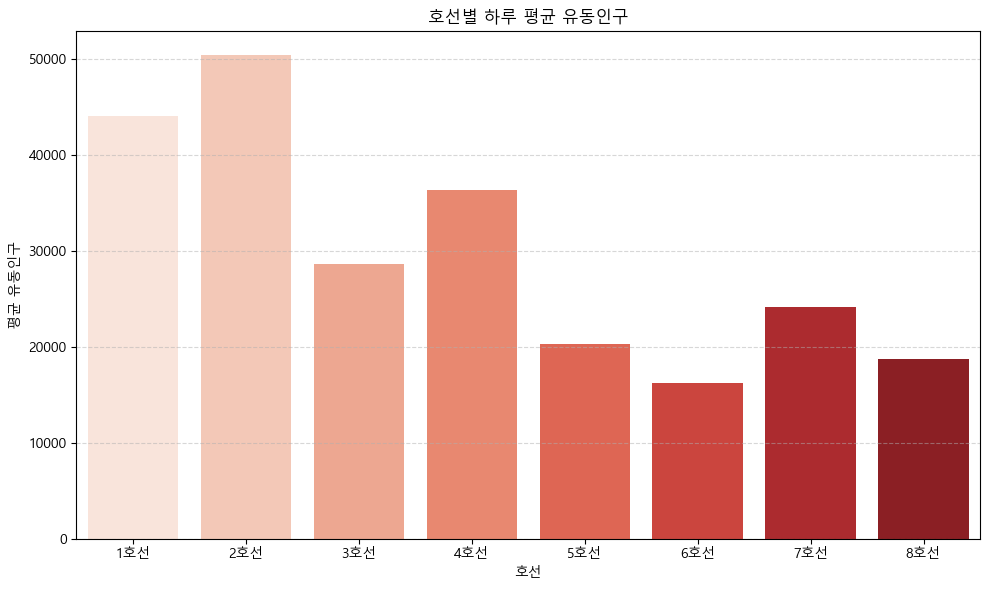

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='호선', y='호선별_하루_평균유동인구', data=df, palette='Reds')
plt.title('호선별 하루 평균 유동인구')
plt.xlabel('호선')
plt.ylabel('평균 유동인구')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
